In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [ ]:
train_data = datasets.MNIST(
    root= 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root= 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
train_data.data.shape

In [ ]:
train_data.targets.size()

In [ ]:
train_data.targets

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data, 
                        batch_size =100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data, 
                        batch_size =100,
                        shuffle=True,
                        num_workers=1),
}

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):  # Fixed: double underscores __init__
        super(CNN, self).__init__()  # Fixed: double underscores __init__
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # Fixed: conv1 (not convl)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):  # Fixed: Proper indentation (was inside __init__)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Changed to log_softmax with dim

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)  # Fixed: This line was outside the for loop
            test_loss += loss_fn(output, target).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()  # Fixed: Added parentheses

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

In [ ]:
for epoch in range(1,11):
    train(epoch)
    test()

In [ ]:
device

In [ ]:
import matplotlib.pyplot as plt
model.eval()

data,target = test_data[4] #modify this to get different results

data = data.unsqueeze(0).to(device)

output = model(data)
prediction = output.argmax(dim =1, keepdim= True).item()

print('Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[8]  # Replace '4' with your desired index
data = data.unsqueeze(0).to(device)  # Add batch dimension
output = model(data)
prediction = output.argmax(dim=1).item()
print(f"Model Prediction: {prediction}, True Label: {target}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

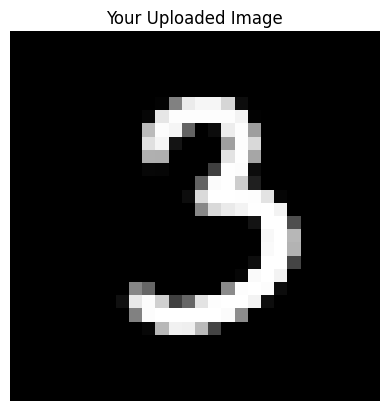

NameError: name 'CNN' is not defined

In [6]:
# upload the images on jupyter manually, then run the code make sure you changed the image file name 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# 1. Load and display your image
img = Image.open('3.png.png').convert('L').resize((28, 28))

# If your digit is white on black, uncomment the next two lines:
# import PIL.ImageOps
# img = PIL.ImageOps.invert(img)

plt.imshow(img, cmap='gray')
plt.title("Your Uploaded Image")
plt.axis('off')
plt.show()

# 2. Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
tensor_img = transform(img).unsqueeze(0)

# 3. Define the simple MNIST model
class Net(nn.Module):
    def _init_(self):
        super(Net, self)._init_()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)  # Change to CNN
MODEL_PATH = 'mnist_cnn.pth'

# 4. Train the model if not already saved
if os.path.exists(MODEL_PATH):
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    print("Loaded pre-trained model from mnist_cnn.pth")
else:
    print("No pre-trained model found. Training a model for 10 epochs (may take several minutes)...")
    import torchvision
    from torch.utils.data import DataLoader
    train_dataset = torchvision.datasets.MNIST('.', train=True, download=True,
                                               transform=transforms.Compose([
                                                   transforms.ToTensor(),
                                                   transforms.Normalize((0.1307,), (0.3081,))
                                               ]))
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    optimizer = torch.optim.Adam(model.parameters())
    model.train()
    for epoch in range(10):  # Train for 10 epochs!
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/10, Loss: {running_loss/len(train_loader):.4f}")
    torch.save(model.state_dict(), MODEL_PATH)
    print("Model trained and saved as mnist_cnn.pth!")

# 5. Predict the digit
model.eval()
with torch.no_grad():
    output = model(tensor_img.to(device))
    pred = output.argmax(dim=1, keepdim=True).item()
print(f"Predicted digit: {pred}")

Loaded pre-trained model from mnist_cnn.pth


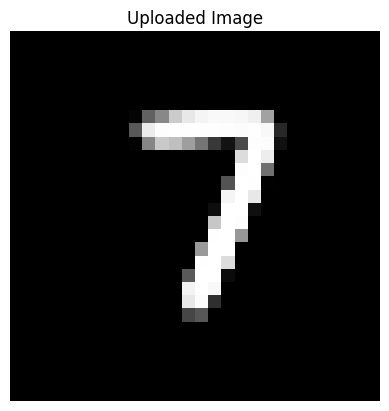

Predicted digit: 7


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Your CNN model definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Function to load and preprocess image
def load_and_preprocess_image(image_path):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L').resize((28, 28))
    
    # If your digit is white on black, uncomment the next line:
    # img = ImageOps.invert(img)
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("Uploaded Image")
    plt.axis('off')
    plt.show()
    
    # Preprocess the image
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    return transform(img).unsqueeze(0)  # Add batch dimension

# Main prediction function
def predict_digit(image_path):
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Initialize model
    model = CNN().to(device)
    MODEL_PATH = 'mnist_cnn.pth'
    
    # Load or train model
    if os.path.exists(MODEL_PATH):
        model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
        print("Loaded pre-trained model from mnist_cnn.pth")
    else:
        print("No pre-trained model found. Training a new model...")
        model = train_model(model, device)
    
    # Preprocess image
    tensor_img = load_and_preprocess_image(image_path)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(tensor_img.to(device))
        pred = output.argmax(dim=1, keepdim=True).item()
    
    print(f"Predicted digit: {pred}")
    #return pred

#TEST HERE - change image here
predict_digit('7.png.png')
